In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pylab as plt

In [3]:
from glob import glob
import json, sys, os, librosa
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [50]:
from config import C
C.language='amharic'
C.extension='_gradscaler'
C.batch_size=12
C.save_every = 5
C.start_from = 241
C.update()

In [6]:
files=glob(f'{C.nr_dir}/*')
n_samples=len(files)
samples=list(sorted([(librosa.load(audio_file, sr=C.sample_rate)[0].shape[0], audio_file) for audio_file in files]))

In [7]:
samples[0:2]

[(897,
  'NIST/openasr20_amharic/build/audio_split_8000/BABEL_OP3_307_25767_20140403_234644_inLine_055_423.635_424.045.wav'),
 (932,
  'NIST/openasr20_amharic/build/audio_split_8000/BABEL_OP3_307_71263_20140602_180728_inLine_048_331.265_331.655.wav')]

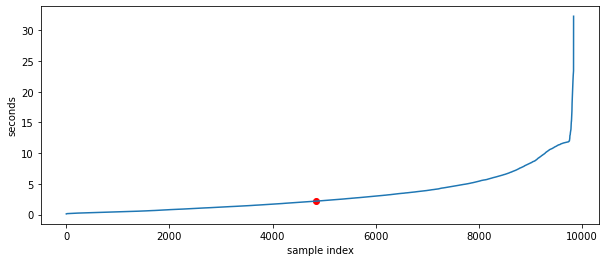

In [32]:
plt.figure(figsize=(10,4))
plt.plot([x[0]/C.sample_rate for x in samples]);
plt.ylabel('seconds')
plt.xlabel('sample index')
plt.scatter([4842],[samples[4841][0]/C.sample_rate], color='red')

In [33]:
max_trained_phrase_length_in_samples=samples[4841][0]
max_trained_phrase_length_in_samples

17530

In [38]:
with open(f'{C.analysis_dir}/max_trained_phrase_length_in_samples.json', 'w') as f:
    json.dump(max_trained_phrase_length_in_samples, f)

In [45]:
vars(C)

{'stage': 'NIST',
 'sample_rate': 8000,
 'batch_size': 12,
 'n_epochs': 3,
 'save_every': 5,
 'extension': '_gradscaler',
 'language': 'amharic',
 'start_from': 241,
 'model_name': 'amharic_8000_end2end_asr_pytorch_drop0.1_cnn_batch12_4_vgg_layer4_gradscaler',
 'model_dir': 'save/amharic_8000_end2end_asr_pytorch_drop0.1_cnn_batch12_4_vgg_layer4_gradscaler',
 'best_model': 'save/amharic_8000_end2end_asr_pytorch_drop0.1_cnn_batch12_4_vgg_layer4_gradscaler/best_model.th',
 'analysis_dir': 'analysis/amharic',
 'grapheme_dictionary_fn': 'analysis/amharic/amharic_characters.json',
 'build_dir': 'NIST/openasr20_amharic/build',
 'split_dir': 'NIST/openasr20_amharic/build/audio_split',
 'nr_dir': 'NIST/openasr20_amharic/build/audio_split_8000',
 'stm_dir': 'NIST/openasr20_amharic/build/transcription_stm',
 'max_trained_samples_fn': 'analysis/amharic/max_trained_phrase_length_in_samples.json'}

In [47]:
with open(C.max_trained_samples_fn,'r') as f: 
    foo=json.load(f)
foo

17530

In [53]:
C.max_trained_sample()

17530